# Aula 03 - Pré Processamento

---



Leitura e formato dos dados do Titanic:

In [5]:
import numpy as np
import pandas as pd

df_dataset = pd.read_csv('titanic.data', sep=',', index_col=None)
# a descricao dos dados pode ser obtida em https://www.kaggle.com/c/titanic/data

df_dataset.shape

(891, 12)

Uma primeira impressão sobre os dados e os descritores estatísticos:

In [6]:
display(df_dataset.head(n=5))
display(df_dataset.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


A partir dos dados será que existe uma relação entre a classe que estava viajando e quem sobreviveu? Ou o sexo?

In [7]:
df_dataset[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
df_dataset[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


A visualização de dados também pode auxiliar no processo. Verificando a idade:

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(df_dataset, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Analisando graficamente a comparação da classe em que viajavam e se sobreviveram ou não, associado à idade:

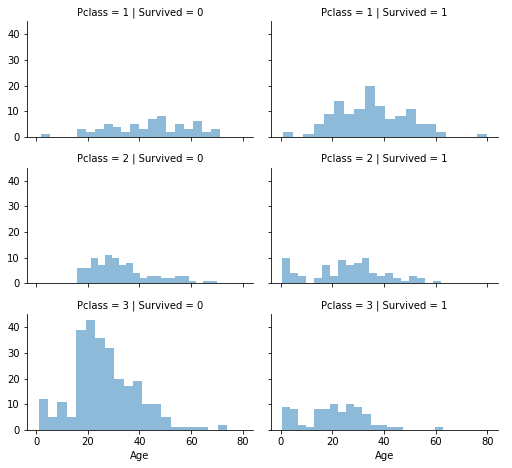

In [10]:
grid = sns.FacetGrid(df_dataset, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

O processo de análise das variáveis pode continuar, o que é chamado de análise exploratória.
Em seguida, observados quais atributos podem ser interessante, a primeira etapa é remover remover os atributos que julgar desnecessários:

In [11]:
df_removed = df_dataset.drop(['Name','Cabin', 'PassengerId', 'Ticket'], axis = 1)
df_removed.shape

(891, 8)

Em seguida, pode-se verificar quais colunas têm valores ausente e se compensa preenchê-las ou removê-las:

In [12]:
df_removed.isna().sum()/df_removed.shape[0]

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.002245
dtype: float64

Foi verificado que a idade tem certa importância para sobreviver ou não, portanto seria prejudicial removê-la. A coluna Embarked só poderá ser removida mediante alguns testes. Nesse caso, é importante verificar se é preferível eliminá-la ou se é preferível remover as linhas em que esse valor é ausente. Para preencher a coluna de idade é necessário adotar um valor fixo, ou utilizar apenas um conjunto de dados de treino para estabelecer uma estatística.

In [13]:
# se o desejo for remover as amostras onde idade ou onde embarcou é vazio, poderia ser utilizado o seguinte comando:
df_dropna = df_removed.dropna(subset = ['Age','Embarked'])
df_dropna.shape

(712, 8)

In [14]:
# se o desejo for de preencher com um valor fixo, poderia ser utilizado o seguinte comando:
values = {'Age': 20, 'Embarked': 'NaN'}
df_filled = df_removed.fillna(value=values)
df_filled.shape

(891, 8)

Em seguida, é comum verificar se os valores nulos continuam aparecendo para evitar erros:

In [15]:
df_filled.isna().sum()/df_filled.shape[0]

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

Removidas as combinações de dados faltantes, é necessário tratar os dados em termos de transformação numérica e simbólica para que os métodos de aprendizado possam ser aplicados:

In [16]:
df_filled.Sex[df_filled.Sex == 'female'] = 0
df_filled.Sex[df_filled.Sex == 'male'] = 1

df_dummy = pd.get_dummies(df_filled, columns=['Embarked'])

display(df_dummy.columns)
display(df_dummy.shape)

C:\Users\edson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\edson\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_NaN', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

(891, 11)

Em seguida, começa a própria etapa de aprendizagem, com a divisão de dados e finalmente a avaliação do modelo:

In [17]:
from sklearn.model_selection import train_test_split

X_columns = df_dummy.columns.tolist()
X_columns.remove('Survived')

display(X_columns)

X = df_dummy[X_columns]
y = df_dummy.Survived

display(X.shape)
display(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019)

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked_C',
 'Embarked_NaN',
 'Embarked_Q',
 'Embarked_S']

(891, 10)

(891,)

### Utilizando os vizinhos próximos como algoritmo:

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [19]:
y_pred = knn.predict(X_test)

In [20]:
from sklearn import metrics
print("Acurácia:", metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.6492537313432836


### Utilizando Naive Bayes e algumas variações para analisar os resultados

In [21]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Acurácia:", metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.7350746268656716


In [22]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Acurácia:", metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.7835820895522388


## Exercício

Explore diferentes técnicas de pré-processamento (como remover as linhas, em vez de preenchê-las, e vice-versa) e mude os parâmetros tanto dos vizinhos próximos quanto dos métodos baseados no teorema de Bayes, para o objetivo de maximizar o resultado de acurácia.

In [23]:
import numpy as np
import pandas as pd

df_dataset = pd.read_csv('titanic.data', sep=',', index_col=None)

In [24]:
df_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
df_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
df_dataset = df_dataset.dropna(subset = ['Age'])
df_dataset.Sex[df_dataset.Sex == 'female'] = 0
df_dataset.Sex[df_dataset.Sex == 'male'] = 1

df_dataset = pd.get_dummies(df_dataset, columns=['Embarked'])

C:\Users\edson\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
X_columns = df_dataset.columns.tolist()
X_columns.remove('Survived')
X_columns.remove('Name')
X_columns.remove('Cabin')
X_columns.remove('PassengerId')
X_columns.remove('Ticket')


In [28]:
df_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,1,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,0,0,1


In [29]:
df_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.182073,0.039216,0.775910
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930,0.386175,0.194244,0.417274
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000,0.000000,0.000000,1.000000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,0.000000,0.000000,1.000000
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [30]:
X = df_dataset[X_columns]
y = df_dataset.Survived

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

In [32]:
melhorAcuracia = 0
melhorResposta = ""

for testeI in range(10):
    if testeI is not 0:
        percentualTeste = testeI/10

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=percentualTeste, random_state=2019)
        
        print("Gaussian NB")
        model = GaussianNB()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        gaussianoMB = metrics.accuracy_score(y_test, y_pred)
        
        print("Teste "+str(percentualTeste*100)+"% gaussianoMB Acurácia:"+str(gaussianoMB) )
        
        if gaussianoMB > melhorAcuracia:
            melhorAcuracia = gaussianoMB
            melhorResposta = "Teste "+str(percentualTeste*100)+"% gaussianoMB Acurácia: "+str(gaussianoMB) 
        
        print("Bernoulli NB")
        model = BernoulliNB()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        bernoulliNB = metrics.accuracy_score(y_test, y_pred)
        
        print("Teste "+str(percentualTeste*100)+"% Bernoulli Acurácia:"+ str(bernoulliNB)  )
        
        if bernoulliNB > melhorAcuracia:
            melhorAcuracia = bernoulliNB
            melhorResposta = "Teste "+str(percentualTeste*100)+"% Bernoulli Acurácia: "+str(bernoulliNB) 
        
        
        print("KNN")
        for i in range(20):
            if i%2 is not 0:
                knn = KNeighborsClassifier(n_neighbors=i)
                knn.fit(X_train, y_train)

                from sklearn import metrics
                y_pred = knn.predict(X_test)
                knnRes = metrics.accuracy_score(y_test, y_pred)

                print("Teste "+str(percentualTeste*100)+"% KNN"+str(i)+" Acurácia :"+ str(knnRes))
                if knnRes > melhorAcuracia:
                    melhorAcuracia = knnRes
                    melhorResposta = "Teste "+str(percentualTeste*100)+"% KNN"+str(i) + "Acurácia:"+str(knnRes) 
                
        print("---------------------")


Gaussian NB
Teste 10.0% gaussianoMB Acurácia:0.7777777777777778
Bernoulli NB
Teste 10.0% Bernoulli Acurácia:0.7777777777777778
KNN
Teste 10.0% KNN1 Acurácia :0.6666666666666666
Teste 10.0% KNN3 Acurácia :0.7083333333333334
Teste 10.0% KNN5 Acurácia :0.6527777777777778
Teste 10.0% KNN7 Acurácia :0.625
Teste 10.0% KNN9 Acurácia :0.5833333333333334
Teste 10.0% KNN11 Acurácia :0.6111111111111112
Teste 10.0% KNN13 Acurácia :0.5833333333333334
Teste 10.0% KNN15 Acurácia :0.5972222222222222
Teste 10.0% KNN17 Acurácia :0.5972222222222222
Teste 10.0% KNN19 Acurácia :0.6527777777777778
---------------------
Gaussian NB
Teste 20.0% gaussianoMB Acurácia:0.7202797202797203
Bernoulli NB
Teste 20.0% Bernoulli Acurácia:0.7902097902097902
KNN
Teste 20.0% KNN1 Acurácia :0.6713286713286714
Teste 20.0% KNN3 Acurácia :0.7062937062937062
Teste 20.0% KNN5 Acurácia :0.6783216783216783
Teste 20.0% KNN7 Acurácia :0.6433566433566433
Teste 20.0% KNN9 Acurácia :0.6853146853146853
Teste 20.0% KNN11 Acurácia :0.6853

In [33]:
        
print("Melhor resultado:")
print(melhorAcuracia)
print(melhorResposta)

Melhor resultado:
0.8186046511627907
Teste 30.0% Bernoulli Acurácia: 0.8186046511627907
